In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import string
import nltk
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

C:\Users\johns\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\johns\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\johns\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\johns\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

In [2]:
df = pd.read_csv('train.csv')
df['sentiment'] = df['sentiment'].replace({'negative' : 0, 'positive' : 1})

def text_cleaning(text):
    text = text.lower()
    # split into tokens by white space
    tokens = text.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

df['review'] = df['review'].apply(text_cleaning)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def dummy_fun(doc):
    return doc




cv_unigrams = CountVectorizer(analyzer='word',
                              tokenizer=dummy_fun,
                              preprocessor=dummy_fun,
                              max_features =100000,
                              token_pattern=None)


cv_bigrams = CountVectorizer(analyzer='word',
                              tokenizer=dummy_fun,
                              preprocessor=dummy_fun,
                              max_features =100000,
                              token_pattern=None, ngram_range=(1,2))

cv_trigrams = CountVectorizer(analyzer='word',
                              tokenizer=dummy_fun,
                              preprocessor=dummy_fun,
                              max_features =100000,
                              token_pattern=None, ngram_range =(1,3))

tfidf_unigrams =  TfidfVectorizer(analyzer='word',
                              tokenizer=dummy_fun,
                              preprocessor=dummy_fun,
                              max_features =100000,
                              token_pattern=None)

tfidf_bigrams =  TfidfVectorizer(analyzer='word',
                              tokenizer=dummy_fun,
                              preprocessor=dummy_fun,
                              max_features =100000,
                              token_pattern=None, ngram_range=(1,2))

tfidf_trigrams =  TfidfVectorizer(analyzer='word',
                              tokenizer=dummy_fun,
                              preprocessor=dummy_fun,
                              max_features =100000,
                              token_pattern=None, ngram_range=(1,3))


In [4]:
vec_list = [cv_unigrams, cv_bigrams, cv_trigrams, tfidf_unigrams, tfidf_bigrams, tfidf_trigrams]

In [5]:

""""def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            counter=0"""

def batch_generator(X, y, batch_size, shuffle):
    number_of_batches = X.shape[0]/batch_size
    counter = 0
    sample_index = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(sample_index)
    while True:
        batch_index = sample_index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X[batch_index,:].toarray()
        y_batch = y[batch_index]
        counter += 1
        yield X_batch, y_batch
        if (counter == number_of_batches):
            if shuffle:
                np.random.shuffle(sample_index)
            counter = 0

In [6]:
            
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=100000))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
X = cv_unigrams.fit_transform(df['review']) 
y = np.array(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

In [8]:
history = model.fit_generator(generator=batch_generator(X_train, y_train, 25, True),
                    epochs=5, validation_data=(X_validation.todense(), y_validation),
                    steps_per_epoch= 768)



Instructions for updating:
Use tf.cast instead.
Epoch 1/5
768/768 [==============================] - 113s 147ms/step - loss: 0.3650 - acc: 0.8415 - val_loss: 0.3109 - val_acc: 0.8673
Epoch 2/5
768/768 [==============================] - 111s 145ms/step - loss: 0.0836 - acc: 0.9694 - val_loss: 0.4615 - val_acc: 0.8540
Epoch 3/5
768/768 [==============================] - 114s 149ms/step - loss: 0.0136 - acc: 0.9954 - val_loss: 0.7913 - val_acc: 0.8475
Epoch 4/5
356/768 [============>.................] - ETA: 59s - loss: 0.0019 - acc: 0.9996

KeyboardInterrupt: 

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
def test_all_accuracy(vectorizer_list, reviews, sentiment):
    score_list = list()
    cm_list = list()
    f1_list = list()
    y = np.array(sentiment)
    for vec in vectorizer_list:
        X = vec.fit_transform(reviews)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
        model = Sequential()
        model.add(Dense(128, activation='relu', input_dim=100000))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit_generator(generator=batch_generator(X_train, y_train, 25, True),
                    epochs=2, validation_data=(X_validation.todense(), y_validation),
                    steps_per_epoch= 768)
        prediction = model.predict_classes(X_test)
        
        score_list.append(accuracy_score(y_test, prediction))
        f1_list.append(f1_score(y_test, prediction))
        cm_list.append(confusion_matrix(y_test, prediction))
    return score_list, cm_list, f1_list

In [24]:
score_list, f1_list, cm_list = test_all_accuracy(vec_list, df['review'], df['sentiment'])

Epoch 1/2
768/768 [==============================] - 115s 149ms/step - loss: 0.3625 - acc: 0.8457 - val_loss: 0.3183 - val_acc: 0.8615
Epoch 2/2
768/768 [==============================] - 117s 153ms/step - loss: 0.0761 - acc: 0.9718 - val_loss: 0.4235 - val_acc: 0.8550
Epoch 1/2
768/768 [==============================] - 113s 147ms/step - loss: 0.3454 - acc: 0.8527 - val_loss: 0.3020 - val_acc: 0.8717
Epoch 2/2
768/768 [==============================] - 115s 150ms/step - loss: 0.0317 - acc: 0.9884 - val_loss: 0.5600 - val_acc: 0.8585
Epoch 1/2
768/768 [==============================] - 113s 147ms/step - loss: 0.3491 - acc: 0.8508 - val_loss: 0.2897 - val_acc: 0.8731
Epoch 2/2
768/768 [==============================] - 112s 146ms/step - loss: 0.0327 - acc: 0.9886 - val_loss: 0.5374 - val_acc: 0.8602
Epoch 1/2
768/768 [==============================] - 120s 157ms/step - loss: 0.3606 - acc: 0.8454 - val_loss: 0.2946 - val_acc: 0.8758
Epoch 2/2
768/768 [==============================] - 11

In [25]:
score_list

[0.8508333333333333,
 0.86,
 0.857,
 0.8503333333333334,
 0.8641666666666666,
 0.8723333333333333]

In [26]:
small_vec = [tfidf_bigrams, tfidf_trigrams]

In [34]:
hidden_list = [20,30,40,50,60]

In [35]:
def test_one_hidden(vectorizer_list, hidden_list, reviews, sentiment):
    score_list = list()
    cm_list = list()
    f1_list = list()
    y = np.array(sentiment)
    for vec in vectorizer_list:
        X = vec.fit_transform(reviews)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
        
        for n_hidden in hidden_list:
            model = Sequential()
            model.add(Dense(n_hidden, activation='relu', input_dim=100000))
            model.add(Dense(1, activation='sigmoid'))
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            history = model.fit_generator(generator=batch_generator(X_train, y_train, 25, True),
                        epochs=2, validation_data=(X_validation.todense(), y_validation),
                        steps_per_epoch= 768)
            prediction = model.predict_classes(X_test)

            score_list.append(accuracy_score(y_test, prediction))
            f1_list.append(f1_score(y_test, prediction))
            cm_list.append(confusion_matrix(y_test, prediction))
            
    return score_list, cm_list, f1_list

In [37]:
def test_two_hidden(vectorizer_list, hidden_list, reviews, sentiment):
    score_list = list()
    cm_list = list()
    f1_list = list()
    y = np.array(sentiment)
    for vec in vectorizer_list:
        X = vec.fit_transform(reviews)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
        
        for n_hidden in hidden_list:
            model = Sequential()
            model.add(Dense(n_hidden[0], activation='relu', input_dim=100000))
            model.add(Dense(n_hidden[1], activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            history = model.fit_generator(generator=batch_generator(X_train, y_train, 25, True),
                        epochs=2, validation_data=(X_validation.todense(), y_validation),
                        steps_per_epoch= 768)
            prediction = model.predict_classes(X_test)

            score_list.append(accuracy_score(y_test, prediction))
            f1_list.append(f1_score(y_test, prediction))
            cm_list.append(confusion_matrix(y_test, prediction))
            
    return score_list, cm_list, f1_list

In [36]:
score_list, f1_list, cm_list = test_one_hidden(small_vec, hidden_list, df['review'], df['sentiment'])

Epoch 1/2
768/768 [==============================] - 30s 39ms/step - loss: 0.4426 - acc: 0.8442 - val_loss: 0.3005 - val_acc: 0.8823
Epoch 2/2
768/768 [==============================] - 28s 36ms/step - loss: 0.1184 - acc: 0.9727 - val_loss: 0.2786 - val_acc: 0.8835
Epoch 1/2
768/768 [==============================] - 42s 55ms/step - loss: 0.4125 - acc: 0.8520 - val_loss: 0.2885 - val_acc: 0.8850
Epoch 2/2
768/768 [==============================] - 36s 46ms/step - loss: 0.0933 - acc: 0.9782 - val_loss: 0.2839 - val_acc: 0.8804
Epoch 1/2
768/768 [==============================] - 48s 62ms/step - loss: 0.3934 - acc: 0.8602 - val_loss: 0.2822 - val_acc: 0.8860
Epoch 2/2
768/768 [==============================] - 45s 59ms/step - loss: 0.0755 - acc: 0.9815 - val_loss: 0.2874 - val_acc: 0.8825
Epoch 1/2
768/768 [==============================] - 55s 72ms/step - loss: 0.3859 - acc: 0.8537 - val_loss: 0.2787 - val_acc: 0.8838
Epoch 2/2
768/768 [==============================] - 53s 69ms/step - 

In [39]:
hidden_list2 = [(20,10), (30,15), (40,20),(64,32), (128, 64)]
score_list2, f1_list2, cm_list2 = test_two_hidden(small_vec, hidden_list2, df['review'], df['sentiment'])

Epoch 1/2
768/768 [==============================] - 38s 50ms/step - loss: 0.3799 - acc: 0.8577 - val_loss: 0.2832 - val_acc: 0.8815
Epoch 2/2
768/768 [==============================] - 36s 47ms/step - loss: 0.0525 - acc: 0.9846 - val_loss: 0.3227 - val_acc: 0.8750
Epoch 1/2
768/768 [==============================] - 48s 62ms/step - loss: 0.3642 - acc: 0.8572 - val_loss: 0.2940 - val_acc: 0.8794
Epoch 2/2
768/768 [==============================] - 47s 62ms/step - loss: 0.0426 - acc: 0.9882 - val_loss: 0.3325 - val_acc: 0.8740
Epoch 1/2
768/768 [==============================] - 58s 75ms/step - loss: 0.3665 - acc: 0.8408 - val_loss: 0.2886 - val_acc: 0.8810
Epoch 2/2
768/768 [==============================] - 56s 73ms/step - loss: 0.0427 - acc: 0.9869 - val_loss: 0.3354 - val_acc: 0.8727
Epoch 1/2
768/768 [==============================] - 76s 99ms/step - loss: 0.3471 - acc: 0.8554 - val_loss: 0.2930 - val_acc: 0.8771
Epoch 2/2
768/768 [==============================] - 78s 101ms/step -

In [40]:
score_list2

[0.8733333333333333,
 0.868,
 0.8705,
 0.8663333333333333,
 0.8653333333333333,
 0.8741666666666666,
 0.8716666666666667,
 0.8723333333333333,
 0.868,
 0.8618333333333333]

In [41]:
score_list

[0.879,
 0.8811666666666667,
 0.8811666666666667,
 0.8765,
 0.8711666666666666,
 0.8795,
 0.8795,
 0.8745,
 0.8765,
 0.8791666666666667]

In [43]:
MLP = Sequential()
MLP.add(Dense(40, activation='relu', input_dim=100000))
MLP.add(Dense(1, activation='sigmoid'))
MLP.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
MLP.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 40)                4000040   
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 41        
Total params: 4,000,081
Trainable params: 4,000,081
Non-trainable params: 0
_________________________________________________________________


In [44]:
import seaborn as sns

In [47]:
cm_list

[0.8830541237113402,
 0.8859382498800192,
 0.8840838887985694,
 0.8784249384741591,
 0.8792753396845229,
 0.8846706013718296,
 0.8841531805800353,
 0.8783718300759167,
 0.8815726386447178,
 0.8819410519459372]

In [68]:
X = tfidf_bigrams.fit_transform(df['review'])
y = np.array(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1)
        

In [69]:
MLP = Sequential()
MLP.add(Dense(40, activation='relu', input_dim=100000))
MLP.add(Dense(1, activation='sigmoid'))
MLP.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = MLP.fit_generator(generator=batch_generator(X_train, y_train, 25, True),
                        epochs=2, validation_data=(X_validation.todense(), y_validation),
                        steps_per_epoch= 768)
prediction = MLP.predict_classes(X_test)


Epoch 1/2
768/768 [==============================] - 52s 68ms/step - loss: 0.3983 - acc: 0.8493 - val_loss: 0.2829 - val_acc: 0.8817
Epoch 2/2
768/768 [==============================] - 56s 73ms/step - loss: 0.1037 - acc: 0.9688 - val_loss: 0.2745 - val_acc: 0.8875


In [70]:
cm = confusion_matrix(prediction, y_test)
cm

array([[2612,  335],
       [ 353, 2700]], dtype=int64)

Text(33.0, 0.5, 'Actual')

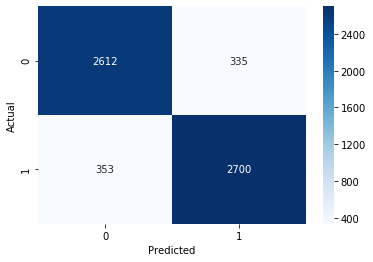

In [71]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [72]:
accuracy_score(prediction, y_test)

0.8853333333333333

In [73]:
f1_score(prediction, y_test)

0.8869908015768726